In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance


In [2]:
def gmm20k(blue,orange):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            blue = np.asarray(blue)
            blue =blue.reshape(-1,1)
            gmm.fit(blue)
            bic.append(gmm.bic(blue))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmblue = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            orange = np.asarray(orange)
            orange =orange.reshape(-1,1)
            gmm.fit(orange)
            bic.append(gmm.bic(orange))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmorange = gmm
    
    means=[]
    for tt in range(len(best_gmmblue.means_)):
        means.append(best_gmmblue.means_[tt][0])
    x = dict(zip(means,best_gmmblue.weights_))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    #print(od1)
    means=[]
    for tt in range(len(best_gmmorange.means_)):
        means.append(best_gmmorange.means_[tt][0])
    y = dict(zip(means,best_gmmorange.weights_))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    #print(od2)
    maxx = max(len(od1),len(od2))
    diff = abs(len(od1) - len(od2))
    if len(od2) > len(od1):
        for i in range(0,diff):
            od1.append((0,0))
    elif len(od2) < len(od1):
        for i in range(0,diff):
            od2.append((0,0))

    diffmean = []
    diffweights = []
    for tt in range(len(od2)):
        diffmean.append(abs(od1[tt][1] - od2[tt][1]))
        diffweights.append(abs(od1[tt][0] - od2[tt][0])) 
    #print(diffweights)
    r=[]
    for i in range(0,len(diffmean)):
        r.append(diffmean[i] * diffweights[i])
    #print(len(od1) , len(od2))
    return od1,od2,sum(r)

In [3]:
def gmm10k(blue,orange):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            blue = np.asarray(blue)
            blue =blue.reshape(-1,1)
            gmm.fit(blue)
            bic.append(gmm.bic(blue))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmblue = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            orange = np.asarray(orange)
            orange =orange.reshape(-1,1)
            gmm.fit(orange)
            bic.append(gmm.bic(orange))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmorange = gmm
    
    #print(best_gmmblue.get_params())
    #print(best_gmmorange.get_params())
    #print(best_gmmblue.means_)
    #print(best_gmmorange.means_)
    #print(best_gmmblue.weights_)
    #print(best_gmmorange.weights_)
    means=[]
    for tt in range(len(best_gmmblue.means_)):
        means.append(best_gmmblue.means_[tt][0])
    x = dict(zip(best_gmmblue.weights_,means))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    means=[]
    for tt in range(len(best_gmmorange.means_)):
        means.append(best_gmmorange.means_[tt][0])
    y = dict(zip(best_gmmorange.weights_,means))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    maxx = max(len(od1),len(od2))
    diff = abs(len(od1) - len(od2))
    if len(od2) > len(od1):
        for i in range(0,diff):
            od1.append((0,0))
    elif len(od2) < len(od1):
        for i in range(0,diff):
            od2.append((0,0))
    #print(maxx)
    #print(od1)
    #print(od2)
    diffmean = []
    diffweights = []
    for tt in range(len(od2)):
        diffmean.append(abs(od1[tt][1] - od2[tt][1]))
        diffweights.append(abs(od1[tt][0] - od2[tt][0])) 
    #print(diffweights)
    r=[]
    for i in range(0,len(diffmean)):
        r.append(diffmean[i] * diffweights[i])
    #print(len(od1) , len(od2))
    return od1,od2,sum(r)

In [4]:
def jacciboi(blue,orange):
    blue = np.append(blue,orange.max())
    blue = np.append(blue,orange.min())
    orange = np.append(orange,blue.max())
    orange = np.append(orange,blue.min())
    count1, bin_edges1 = np.histogram(blue, bins=20)
    count2, bin_edges2 = np.histogram(orange, bins=20)
    intersect=[]
    union=[]
    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()
    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()
    jacc1 = isum/usum
    jacc1
    return jacc1

<AxesSubplot:ylabel='Density'>

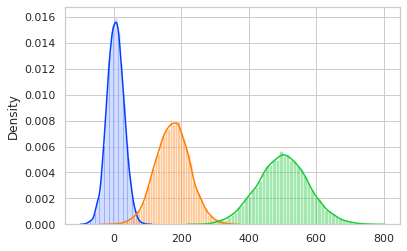

In [5]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=175,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
blue = np.concatenate((value1,value2,value3))
sns.distplot(value1,bins=50)
sns.distplot(value2,bins=50)
sns.distplot(value3,bins=50)

In [6]:
_,_,r12 = gmm10k(value1,value2)
_,_,r23 = gmm10k(value2,value3)
_,_,r13 = gmm10k(value1,value3)

## Edge case - one component only so diffweight = 0, metric = 0

In [7]:
print(r12,r23,r13)

0.0 0.0 0.0


In [8]:
_,_,r12 = gmm20k(value1,value2)
_,_,r23 = gmm20k(value2,value3)
_,_,r13 = gmm20k(value1,value3)

In [9]:
print(r12,r23,r13)

0.0 0.0 0.0


<AxesSubplot:ylabel='Density'>

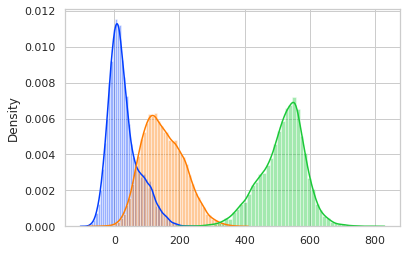

In [10]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
sns.distplot(blue,bins=50)
sns.distplot(orange,bins=50)
sns.distplot(green,bins=50)

In [11]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r23 = gmm10k(orange,green)
_,_,r13 = gmm10k(blue,green)

In [12]:
w1

[(0.7412219242970148, 7.286451167703913),
 (0.25877807570298417, 87.88235169732363)]

In [13]:
w2

[(0.5644716117259211, 109.74532363273657),
 (0.43552838827408125, 201.53850869166106)]

In [14]:
w3

[(0.5631124992329021, 109.64482311605664),
 (0.43688750076709665, 201.38248644944684),
 (0, 0),
 (0, 0),
 (0, 0)]

In [15]:
w4

[(0.4370896450573928, 557.2033256395977),
 (0.28617122643910253, 507.9902642136082),
 (0.18254011013176272, 438.76915171107026),
 (0.050318719561138994, 632.0398964159511),
 (0.043880298810601084, 362.0603367994791)]

In [16]:
print(r12,r23,r13)

38.19839900825517 230.397105184326 305.8584873843776


In [17]:
print(wasserstein_distance(orange,blue))
print(wasserstein_distance(orange,green))
print(wasserstein_distance(green,blue))

121.58095835968666
366.97986252294044
488.560820882627


In [18]:
print(jacciboi(orange,blue))
print(jacciboi(orange,green))
print(jacciboi(green,blue))

0.16078613432373878
0.005462283435541704
0.0002000133342222815


<AxesSubplot:ylabel='Density'>

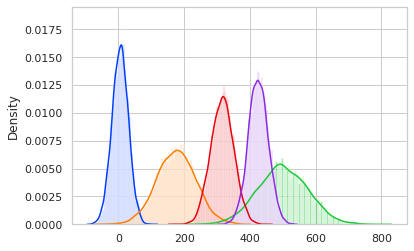

In [53]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
#blue = np.concatenate((value1,value2))
blue = value1
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
#orange = np.concatenate((value1,value2))
orange = value1
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
#green = np.concatenate((value1,value2))
green = value1
value1 = np.random.normal(loc=315,scale=35,size=10000)
value2 = np.random.normal(loc=280,scale=45,size=5000)
#red = np.concatenate((value1,value2))
red = value1
value1 = np.random.normal(loc=425,scale=30,size=10000)
value2 = np.random.normal(loc=475,scale=45,size=5000)
#violet = np.concatenate((value1,value2))
violet = value1
sns.distplot(blue,bins=150)
sns.distplot(orange,bins=150)
sns.distplot(green,bins=150)
sns.distplot(red,bins=150)
sns.distplot(violet,bins=150)

In [54]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,_,r14 = gmm10k(blue,red)
_,_,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)

0.0 0.0 0.0 0.0


In [55]:
print(wasserstein_distance(blue,orange))
print(wasserstein_distance(blue,green))
print(wasserstein_distance(blue,red))
print(wasserstein_distance(blue,violet))

171.07583882748202
494.9262543091763
310.7366553862144
420.21951883754963


In [56]:
print(jacciboi(blue,orange))
print(jacciboi(blue,green))
print(jacciboi(blue,red))
print(jacciboi(blue,violet))

0.02275167442098267
0.00014999250037498125
0.00014999250037498125
0.00014999250037498125


In [57]:
print(jacciboi(blue,orange))
print(jacciboi(orange,red))
print(jacciboi(red,violet))
print(jacciboi(green,violet))

0.02275167442098267
0.07036224517095618
0.05074062401512764
0.24829953198127924


<AxesSubplot:ylabel='Density'>

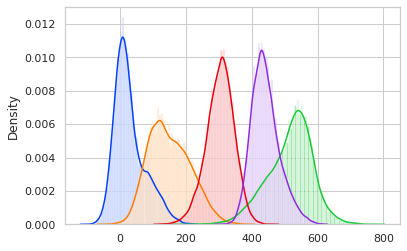

In [58]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
#blue = value1
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
#orange = value1
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
#green = value1
value1 = np.random.normal(loc=315,scale=35,size=10000)
value2 = np.random.normal(loc=280,scale=45,size=5000)
red = np.concatenate((value1,value2))
#red = value1
value1 = np.random.normal(loc=425,scale=30,size=10000)
value2 = np.random.normal(loc=475,scale=45,size=5000)
violet = np.concatenate((value1,value2))
#violet = value1
sns.distplot(blue,bins=150)
sns.distplot(orange,bins=150)
sns.distplot(green,bins=150)
sns.distplot(red,bins=150)
sns.distplot(violet,bins=150)

In [59]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,_,r14 = gmm10k(blue,red)
_,_,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)

36.63243001728226 358.9656756950491 75.06030805822743 59.692227801233045


In [60]:
print(wasserstein_distance(blue,orange))
print(wasserstein_distance(blue,green))
print(wasserstein_distance(blue,red))
print(wasserstein_distance(blue,violet))

121.43166506226542
487.7898695071276
275.31583324285384
413.2217542108509


In [61]:
print(jacciboi(blue,orange))
print(jacciboi(blue,green))
print(jacciboi(blue,red))
print(jacciboi(blue,violet))

0.1614151892854378
0.00026670222696359517
0.003881156316916488
9.999666677777408e-05


In [62]:
print(jacciboi(blue,orange))
print(jacciboi(orange,red))
print(jacciboi(red,violet))
print(jacciboi(green,violet))

0.1614151892854378
0.08986560116236833
0.04046884211256372
0.28063511033334754


<AxesSubplot:ylabel='Density'>

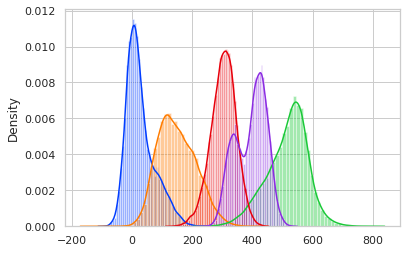

In [27]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
value1 = np.random.normal(loc=315,scale=35,size=10000)
value2 = np.random.normal(loc=280,scale=45,size=5000)
red = np.concatenate((value1,value2))
value1 = np.random.normal(loc=425,scale=30,size=10000)
value2 = np.random.normal(loc=335,scale=25,size=5000)
violet = np.concatenate((value1,value2))
sns.distplot(blue,bins=50)
sns.distplot(orange,bins=50)
sns.distplot(green,bins=50)
sns.distplot(red,bins=50)
sns.distplot(violet,bins=50)

In [31]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,w4,r14 = gmm10k(blue,red)
w1,w5,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)
print(w1)
print(w5)
print(w4)

35.756949392789565 347.6874876149131 84.61956809784508 68.0632342712525
[(0.7347194514315822, 6.569870257349524), (0.26528054856841626, 87.83936652378654)]
[(0.6333911438451543, 427.117969544225), (0.3666088561548412, 339.0012354824454)]
[(0.5666191483373152, 325.32112054668295), (0.4333808516626846, 276.1147939931092)]


In [30]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(orange,green)
_,_,r14 = gmm10k(orange,red)
w1,w5,r15 = gmm10k(orange,violet)
print(r12,r13,r14,r15)

35.80817988013331 287.4922923830208 0.7318444185941729 29.180691843731086


<AxesSubplot:ylabel='Density'>

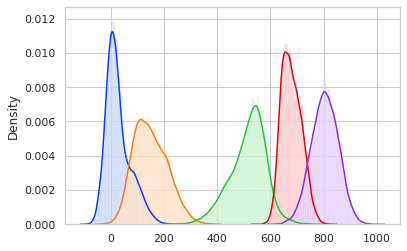

In [39]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
value1 = np.random.normal(loc=695,scale=35,size=10000)
value2 = np.random.normal(loc=650,scale=20,size=5000)
red = np.concatenate((value1,value2))
value1 = np.random.normal(loc=795,scale=50,size=10000)
value2 = np.random.normal(loc=825,scale=45,size=5000)
violet = np.concatenate((value1,value2))
sns.distplot(blue,bins=150)
sns.distplot(orange,bins=150)
sns.distplot(green,bins=150)
sns.distplot(red,bins=150)
sns.distplot(violet,bins=150)

In [42]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,w4,r14 = gmm10k(blue,red)
w1,w5,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)
print(w1,w5)

35.756468548134634 353.445825759516 201.51663666219065 235.85537921451623
[(0.7336701421093879, 6.8263950149518875), (0.26632985789061353, 87.66601158806353)] [(1.0, 804.7365673461071), (0, 0)]


In [44]:
w2,w3,r23 = gmm10k(orange,green)
print(r23)
print(w2)
print(w3)

236.48434273175644
[(0.5720219070864997, 110.82277126501567), (0.4279780929135013, 202.65819517251353), (0, 0), (0, 0), (0, 0)]
[(0.39859736655447786, 561.5884307612861), (0.324679507785209, 514.6523628794695), (0.19073223115556392, 444.7198748995755), (0.05113410112475742, 365.52415496073786), (0.03485679337999165, 647.4719554790129)]


<AxesSubplot:ylabel='Density'>

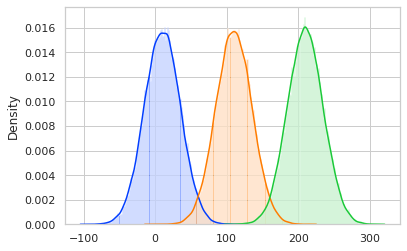

In [47]:
value1 = np.random.normal(loc=10,scale=25,size=50000)
value2 = np.random.normal(loc=110,scale=25,size=50000)
value3 = np.random.normal(loc=210,scale=25,size=50000)
sns.distplot(value1,bins=150)
sns.distplot(value2,bins=150)
sns.distplot(value3,bins=150)

In [48]:
print(wasserstein_distance(value1,value2))
print(wasserstein_distance(value2,value3))
print(wasserstein_distance(value1,value3))

100.01742461762863
99.87236896890406
199.88979358653268
